<a href="https://colab.research.google.com/github/HoangHieuu/Machine-Learning/blob/main/Softmax%20Regression/2_SoftmaxRegression_1D_2Class_Stochastic_Numpy_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload file iris_1D_2c first
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('/content/iris_1D_2c.csv', dtype = None, delimiter = ',', skip_header = 1)

X = iris[:, 0: 1]
y = iris[:, 1]

y = y.astype('uint8')

X, y

(array([[1.4],
        [1.3],
        [1.5],
        [4.5],
        [4.1],
        [4.6]]),
 array([0, 0, 0, 1, 1, 1], dtype=uint8))

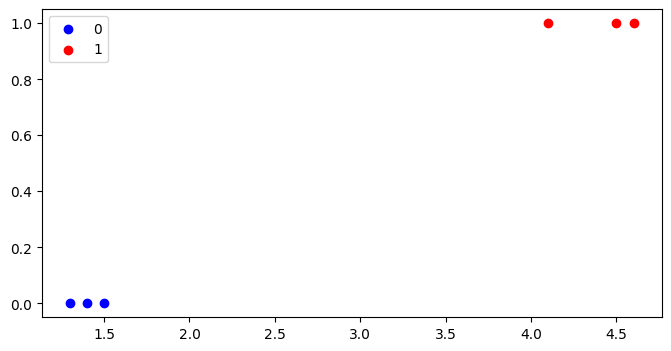

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()
plt.show()

## One_hot Encoding

In [ ]:
N = 6 # numbers of samples
k = 2 # number of classes

# one_hot
import numpy as np

def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

y_one_hot = convert_one_hot(y, k)
print('y_one_hot\n', y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print('X\n', X)

y_one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [ ]:
# initialize parameters
theta = np.array([[0.1, 0.05],
                  [0.2, -0.1]])
print('theta:\n', theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [ ]:
learning_rate = 0.1
max_epochs = 1
losses = []
for epoch in range(max_epochs):
  for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]

    xi = xi.reshape((2,1))
    yi = yi.reshape((2,1))

    #compute z
    z = theta.T.dot(xi)

    #compute probability
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis = 0)

    #compute loss
    loss = -yi.T.dot(np.log(y_hat))
    losses.append(loss[0])

    #compute gradient
    dtheta = xi.dot((y_hat - yi).T)

    #update parameters
    theta = theta - learning_rate * dtheta
    break

In [ ]:
theta

array([[ 0.13846162,  0.01153838],
       [ 0.25384627, -0.15384627]])

## One cell

In [ ]:
iris = np.genfromtxt('/content/iris_1D_2c.csv', dtype = None, delimiter = ',', skip_header=1)

X = iris[:, 0 : 1]
y = iris[:, 1]

y = y.astype('uint8')

X,y


(array([[1.4],
        [1.3],
        [1.5],
        [4.5],
        [4.1],
        [4.6]]),
 array([0, 0, 0, 1, 1, 1], dtype=uint8))

In [ ]:
#One-hot encoding
def convert_one_hot(y, k):
  one_hot = np.zeros(((len(y)), k))
  one_hot[np.arange(len(y)), y] = 1
  return one_hot

y_one_hot = convert_one_hot(y, 2)
y_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

theta = np.array([[0.1, 0.05],
                  [0.2, -0.1]])

X,  theta

(array([[1. , 1.4],
        [1. , 1.3],
        [1. , 1.5],
        [1. , 4.5],
        [1. , 4.1],
        [1. , 4.6]]),
 array([[ 0.1 ,  0.05],
        [ 0.2 , -0.1 ]]))

In [ ]:
N = 6 #number of samples

In [ ]:
lr = 0.1
losses  = []
epochs = 100

for epoch in range(epochs):
  for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]

    xi = xi.reshape((2,1))
    yi = yi.reshape((2,1))

    #compute z
    z = theta.T.dot(xi)

    #compute y_hat
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis = 0)


    # compute the loss
    loss = -np.log(yi.T.dot(y_hat))
    losses.append(loss[0])

    #compute gradient
    dtheta = xi.dot((y_hat -yi).T)

    #update theta
    theta -= dtheta*lr


In [ ]:
theta

array([[ 3.13085488, -2.98085488],
       [-1.11662847,  1.21662847]])

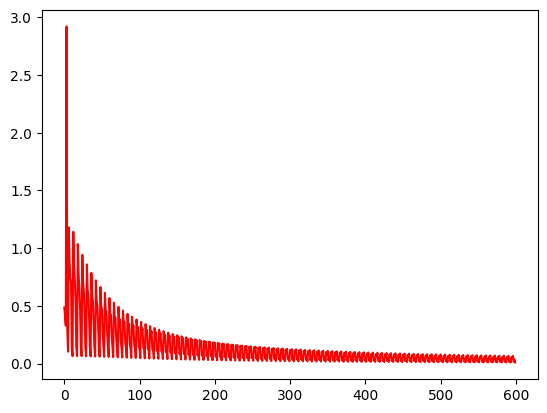

In [ ]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [ ]:
scores = []

for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]
    yi = yi.reshape((2,1))

    # evaluate class scores
    z = theta.T.dot(xi)
    scores.append(z)

predicted_class = np.argmax(scores, axis=1)
predicted_class

array([0, 0, 0, 1, 1, 1])